<a href="https://colab.research.google.com/github/chcorophyll/my_deeplearning_cookbook/blob/master/my_Using_pre_trained_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/DOsinga/deep_learning_cookbook.git

fatal: destination path 'deep_learning_cookbook' already exists and is not an empty directory.


In [2]:
!ls

deep_learning_cookbook	sample_data


In [0]:
import os

path = os.getcwd()
data_path = os.path.join(path, "deep_learning_cookbook")
os.chdir(data_path)

In [4]:
!ls

'03.1 Using pre trained word embeddings.ipynb'
'03.2 Domain specific ranking using word2vec cosine distance.ipynb'
'04.1 Collect movie data from Wikipedia.ipynb'
'04.2 Build a recommender system based on outgoing Wikipedia links.ipynb'
'05.1 Generating Text in the Style of an Example Text.ipynb'
'06.1 Question matching.ipynb'
'07.1 Text Classification.ipynb'
'07.2 Emoji Suggestions.ipynb'
'07.3 Tweet Embeddings.ipynb'
'08.1 Sequence to sequence mapping.ipynb'
'08.2 Import Gutenberg.ipynb'
'08.3 Subword tokenizing.ipynb'
'09.1 Reusing a pretrained image recognition network.ipynb'
'09.2 Images as embeddings.ipynb'
'09.3 Retraining.ipynb'
'10.1 Building an inverse image search service.ipynb'
'11.1 Detecting Multiple Images.ipynb'
'12.1 Activation Optimization.ipynb'
'12.2 Neural Style.ipynb'
'13.1 Quick Draw Cat Autoencoder.ipynb'
'13.2 Variational Autoencoder.ipynb'
'13.5 Quick Draw Autoencoder.ipynb'
'14.1 Importing icons.ipynb'
'14.2 Icon Autoencoding.ipynb'
'14.2 Variational Autoencod

**Text Similarity using Word Embeddings**

In [4]:
% matplotlib inline

import os
from keras.utils import get_file
import gensim
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

figsize(10, 10)

from sklearn.manifold import TSNE
import json
from collections import Counter
from itertools import chain

Using TensorFlow backend.


downloading a pretrained model from Google News. We're using zcat to unzip the file

In [0]:
MODEL = 'GoogleNews-vectors-negative300.bin'
model_path = get_file(MODEL + '.gz', 
                      'https://deeplearning4jblob.blob.core.windows.net/resources/wordvectors/%s.gz' % MODEL)
if not os.path.isdir('generated'):
    os.mkdir('generated')
    
unzipped = os.path.join('generated', MODEL)
if not os.path.isfile(unzipped):
    with open(unzipped, 'wb') as fout:
        zcat = subprocess.Popen(['zcat'], stdin=open(model_path), stdout=fout)
        zcat.wait()

In [6]:
model = gensim.models.KeyedVectors.load_word2vec_format(unzipped, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


take this model for a spin by looking at what things are most similar to espresso

In [8]:
model.most_similar(positive=['espresso'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cappuccino', 0.6888186931610107),
 ('mocha', 0.6686208248138428),
 ('coffee', 0.6616826057434082),
 ('latte', 0.6536753177642822),
 ('caramel_macchiato', 0.6491267681121826),
 ('ristretto', 0.6485546827316284),
 ('espressos', 0.6438628435134888),
 ('macchiato', 0.6428250074386597),
 ('chai_latte', 0.6308027505874634),
 ('espresso_cappuccino', 0.6280542612075806)]

ow for the famous equation, what is like woman if king is like man?

In [0]:
def A_is_to_B_as_C_is_to(a, b, c, topn=1):
    a, b, c = map(lambda x: x if type(x) == list else [x], (a, b, c))
    res = model.most_similar(positive=b+c, negative=a, topn=topn)
    if len(res):
        if topn == 1:
            return res[0][0]
        return [x[0] for x in res]
    return None

In [10]:
A_is_to_B_as_C_is_to('man', 'woman', 'king')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'queen'

use this equation to acurately predict the capitals of countries by looking at what has the same relationship as Berlin has to Germany for selected countries

In [11]:
for country in 'Italy', 'France', 'India', 'China':
    print('%s is the capital of %s' % 
          (A_is_to_B_as_C_is_to('Germany', 'Berlin', country), country))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China


In [12]:
for company in 'Google', 'IBM', 'Boeing', 'Microsoft', 'Samsung':
    products = A_is_to_B_as_C_is_to(
        ['Starbucks', 'Apple'], 
        ['Starbucks_coffee', 'iPhone'], 
        company, topn=3)
    print('%s -> %s' % 
          (company, ', '.join(products)))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Google -> personalized_homepage, app, Gmail
IBM -> DB2, WebSphere_Portal, Tamino_XML_Server
Boeing -> Dreamliner, airframe, aircraft
Microsoft -> Windows_Mobile, SyncMate, Windows
Samsung -> MM_A###, handset, Samsung_SCH_B###


picking three categories of items, drinks, countries and sports

In [13]:
beverages = ['espresso', 'beer', 'vodka', 'wine', 'cola', 'tea']
countries = ['Italy', 'Germany', 'Russia', 'France', 'USA', 'India']
sports = ['soccer', 'handball', 'hockey', 'cycling', 'basketball', 'cricket']

items = beverages + countries + sports
len(items)

18

In [14]:
item_vectors = [(item, model[item]) 
                    for item in items
                    if item in model]
len(item_vectors)

18

In [15]:
item_vectors[0]

('espresso',
 array([-0.19628906, -0.38476562, -0.15820312,  0.578125  ,  0.0022583 ,
         0.13476562,  0.265625  , -0.27539062,  0.16699219,  0.62890625,
        -0.02099609, -0.06738281,  0.3125    , -0.22070312,  0.25976562,
         0.171875  , -0.27539062,  0.13378906,  0.2734375 , -0.18554688,
        -0.25390625,  0.15820312,  0.05249023, -0.49804688, -0.1484375 ,
         0.13378906, -0.25390625,  0.35351562, -0.14550781, -0.07519531,
         0.09765625, -0.05200195,  0.08691406,  0.09277344, -0.24511719,
        -0.28710938,  0.09033203, -0.19726562,  0.03442383,  0.19433594,
         0.12890625, -0.09814453,  0.02355957,  0.07861328, -0.08154297,
        -0.06347656, -0.31640625, -0.20605469,  0.27929688,  0.21679688,
        -0.11425781,  0.42382812, -0.26367188, -0.20898438, -0.05419922,
         0.10644531,  0.23925781,  0.265625  , -0.4609375 , -0.33789062,
        -0.20898438, -0.13378906, -0.16699219, -0.01538086,  0.20019531,
        -0.18457031, -0.31835938, -0.4

In [16]:
item_vectors[0][1].shape

(300,)

use TSNE for clustering

In [17]:
vectors = np.asarray([x[1] for x in item_vectors])
lengths = np.linalg.norm(vectors, axis=1)
norm_vectors = (vectors.T / lengths).T

tsne = TSNE(n_components=2, perplexity=10, verbose=2).fit_transform(norm_vectors)

[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.002s...
[t-SNE] Computed neighbors for 18 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.581543
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 54.6716042, gradient norm = 0.0976674 (50 iterations in 0.012s)
[t-SNE] Iteration 100: error = 78.2801819, gradient norm = 0.8549044 (50 iterations in 0.006s)
[t-SNE] Iteration 150: error = 61.7357941, gradient norm = 0.0647650 (50 iterations in 0.006s)
[t-SNE] Iteration 200: error = 56.7380600, gradient norm = 0.0315841 (50 iterations in 0.006s)
[t-SNE] Iteration 250: error = 60.1744766, gradient norm = 0.0466911 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.174477
[t-SNE] Iteration 300: error = 0.9330571, gradient norm = 0.0009775 (50 iterations in 0.007s)
[t-SNE] Iteration 350: error = 0.7678428, gradient norm = 0.0003676 (50 i

In [18]:
vectors.shape

(18, 300)

In [19]:
len(lengths)

18

In [20]:
lengths.shape

(18,)

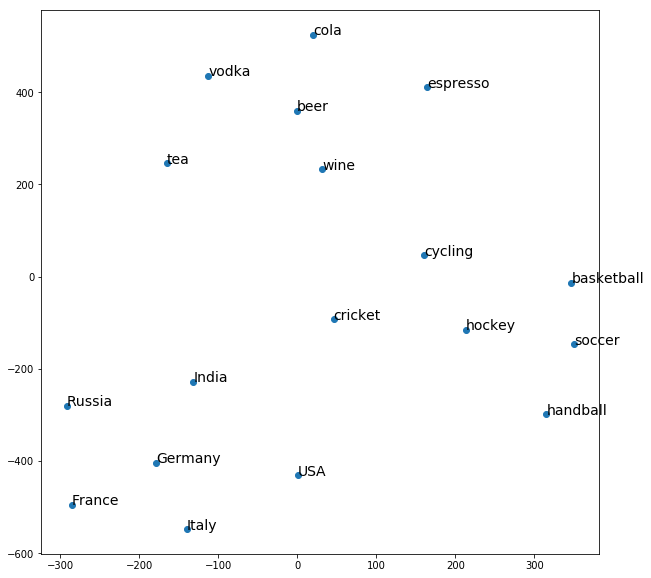

In [21]:
x=tsne[:,0]
y=tsne[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

for item, x1, y1 in zip(item_vectors, x, y):
    ax.annotate(item[0], (x1, y1), size=14)

plt.show()

**Finding entity classes in embeddings**

In [7]:
!pip install geopandas

In [0]:
%matplotlib inline
figsize(12, 8)

from sklearn import svm
from keras.utils import get_file
import os
import gensim
import numpy as np
import random
import requests
import geopandas as gpd
from IPython.core.pylabtools import figsize
import csv

In [24]:
model.most_similar(positive=['Germany'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Austria', 0.7461062669754028),
 ('German', 0.7178750038146973),
 ('Germans', 0.6628648042678833),
 ('Switzerland', 0.6506868004798889),
 ('Hungary', 0.6504982709884644),
 ('Germnay', 0.649348258972168),
 ('Netherlands', 0.6437495946884155),
 ('Cologne', 0.6430779695510864),
 ('symbol_RSTI', 0.6389946937561035),
 ('Annita_Kirsten', 0.634294867515564)]

In [25]:
model.most_similar(positive=['Annita_Kirsten'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Braustolz_GmbH', 0.7545095682144165),
 ('DIARY_Economic_Indicators', 0.7334568500518799),
 ('##-##_#####_Burscheid', 0.7307887673377991),
 ('WKN_A#N#Y#_Symbol', 0.7260339260101318),
 ('Hoevelaken', 0.7067489624023438),
 ('BMW_###si_1min_##.###secs', 0.7050351500511169),
 ('Primera_EUROPE', 0.699741005897522),
 ('symbol_RSTI', 0.6925466656684875),
 ('Severin_Freund', 0.6898956298828125),
 ('However_Joern_Lauterjung', 0.6885738968849182)]

training set with countries and non countries and get a support vector machine to learn the difference.

In [9]:
countries = list(csv.DictReader(open('data/countries.csv')))
countries[0:10]

[OrderedDict([('name', 'Canada'), ('cc', 'ca'), ('cc3', 'can')]),
 OrderedDict([('name', 'Turkmenistan'), ('cc', 'tm'), ('cc3', 'tkm')]),
 OrderedDict([('name', 'Ethiopia'), ('cc', 'et'), ('cc3', 'eth')]),
 OrderedDict([('name', 'Swaziland'), ('cc', 'sz'), ('cc3', 'swz')]),
 OrderedDict([('name', 'Czech_Republic'), ('cc', 'cz'), ('cc3', 'cze')]),
 OrderedDict([('name', 'Cameroon'), ('cc', 'cm'), ('cc3', 'cmr')]),
 OrderedDict([('name', 'UAE'), ('cc', 'ae'), ('cc3', 'are')]),
 OrderedDict([('name', 'Liberia'), ('cc', 'lr'), ('cc3', 'lbr')]),
 OrderedDict([('name', 'Netherlands'), ('cc', 'nl'), ('cc3', 'nld')]),
 OrderedDict([('name', 'East_Timor'), ('cc', 'tl'), ('cc3', 'tls')])]

In [10]:
positive = [x['name'] for x in random.sample(countries, 40)]
negative = random.sample(model.vocab.keys(), 5000)
negative[:4]

['inhale_ammonia_fumes', 'Techie_Diva', 'Xbox_Gamecube', 'pop_tarts']

In [11]:
labelled = [(p, 1) for p in positive] + [(n, 0) for n in negative]
random.shuffle(labelled)
X = np.asarray([model[w] for w, l in labelled])
y = np.asarray([l for w, l in labelled])
X.shape, y.shape

((5040, 300), (5040,))

In [12]:
TRAINING_FRACTION = 0.7
cut_off = int(TRAINING_FRACTION * len(labelled))
clf = svm.SVC(kernel='linear')
clf.fit(X[:cut_off], y[:cut_off])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
res = clf.predict(X[cut_off:])

missed = [country for (pred, truth, country) in 
          zip(res, y[cut_off:], labelled[cut_off:]) if pred != truth]
100 - 100 * float(len(missed)) / len(res), missed

(99.86772486772487, [('Monaco', 1), ('Svalbard', 1)])

In [31]:
model.syn0.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(3000000, 300)

In [14]:
all_predictions = clf.predict(model.syn0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [15]:
res = []
for word, pred in zip(model.index2word, all_predictions):
    if pred:
        res.append(word)
        if len(res) == 150:
            break
random.sample(res, 10)

['Serbian',
 'South_Korea',
 'Latin_America',
 'Portugal',
 'Colombian',
 'Hong_Kong',
 'Romania',
 'France',
 'Sri_Lanka',
 'Malta']

In [16]:
country_to_idx = {country['name']: idx for idx, country in enumerate(countries)}
country_vecs = np.asarray([model[c['name']] for c in countries])
country_vecs.shape

(184, 300)

Quick sanity check to see what is similar to Canada:

In [17]:
dists = np.dot(country_vecs, country_vecs[country_to_idx['Canada']])
for idx in reversed(np.argsort(dists)[-10:]):
    print(countries[idx]['name'], dists[idx])

Canada 7.544024
New_Zealand 3.9619699
Finland 3.9392407
Puerto_Rico 3.838145
Jamaica 3.8102932
Sweden 3.8042789
Slovakia 3.703874
Australia 3.671101
Bahamas 3.6240416
United_States 3.5374339


Ranking countries for a specific term

In [0]:
def rank_countries(term, topn=10, field='name'):
    if not term in model:
        return []
    vec = model[term]
    dists = np.dot(country_vecs, vec)
    return [(countries[idx][field], float(dists[idx])) 
            for idx in reversed(np.argsort(dists)[-topn:])]

In [21]:
rank_countries('cricket')

[('Sri_Lanka', 5.92276668548584),
 ('Zimbabwe', 5.336524963378906),
 ('Bangladesh', 5.192489147186279),
 ('Pakistan', 4.948408126831055),
 ('Guyana', 3.9162838459014893),
 ('Barbados', 3.757995128631592),
 ('India', 3.7504398822784424),
 ('South_Africa', 3.6561501026153564),
 ('New_Zealand', 3.642028570175171),
 ('Fiji', 3.608567714691162)]

visualize this on a world map

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [25]:
!pip install descartes

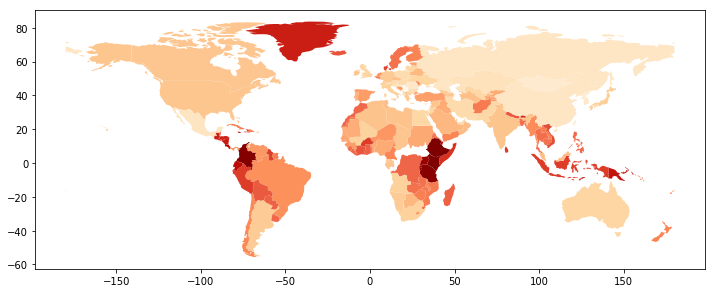

In [26]:
def map_term(term):
    d = {k.upper(): v for k, v in rank_countries(term, topn=0, field='cc3')}
    world[term] = world['iso_a3'].map(d)
    world[term] /= world[term].max()
    world.dropna().plot(term, cmap='OrRd')

map_term('coffee')

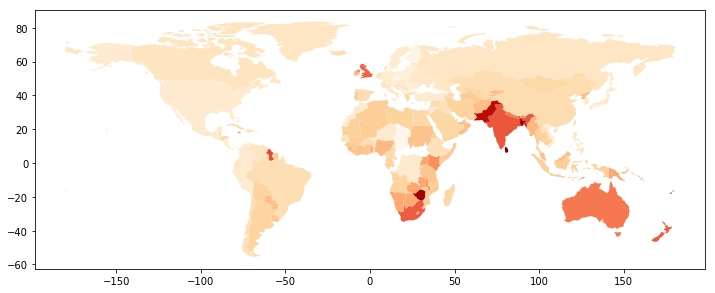

In [27]:
map_term('cricket')

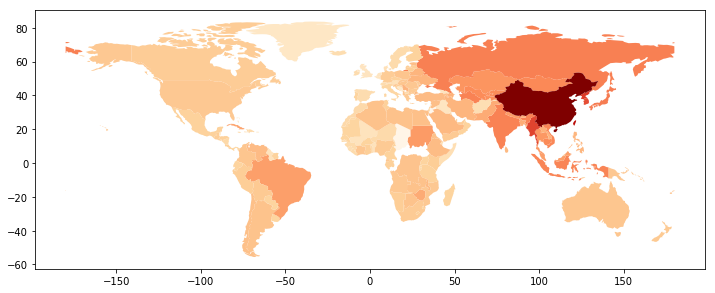

In [28]:
map_term('China')

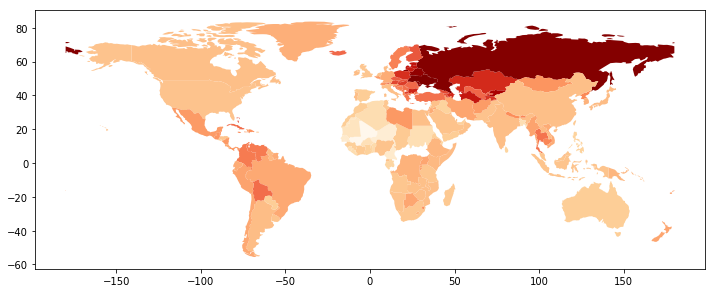

In [29]:
map_term('vodka')